# SRGAN

In [1]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [3]:
import matplotlib.pyplot as plt
from model import generator
%matplotlib inline

## Demo

In [4]:
weights_dir = 'weights'
path_file = lambda dirr, filename: os.path.join(dirr, filename)

pre_generator = generator()
gan_generator = generator()

pre_generator.load_weights(path_file(weights_dir,'pre_generator.h5'))
gan_generator.load_weights(path_file(weights_dir,'gan_generator.h5'))

In [5]:
from model import resolve_single
from utils import load_image, plot_sample, text_phantom

def resolve_and_plot(lr_image_name):  
    lr_image_path=path_file('demo/lowres',lr_image_name)    
    lr = load_image(lr_image_path)    
    
    fl_base=path_file('demo/lowres',lr_image_path).split('/')[-1].split('x')[0]
    
    hr=None
    
    for root, dirs, files in os.walk("demo/higres"):
        for file in files:
            if fl_base in file:       
                hr= path_file(root, file)
                break
        
    hr=load_image(hr) if hr else text_phantom('origin is absence', lr.shape[:2])
        
    pre_sr = resolve_single(pre_generator, lr)
    gan_sr = resolve_single(gan_generator, lr)
    
    plt.figure(figsize=(15, 25))
    
    images = [hr, lr, pre_sr, gan_sr]
    titles = ['origin','LR', 'SR (PRE)', 'SR (GAN)']
    positions = [5, 1, 3, 4]
    
    for i, (img, title, pos) in enumerate(zip(images, titles, positions)):
        plt.subplot(3, 2, pos)
        plt.imshow(img)
        plt.title(title)
        plt.xticks([])
        plt.yticks([])

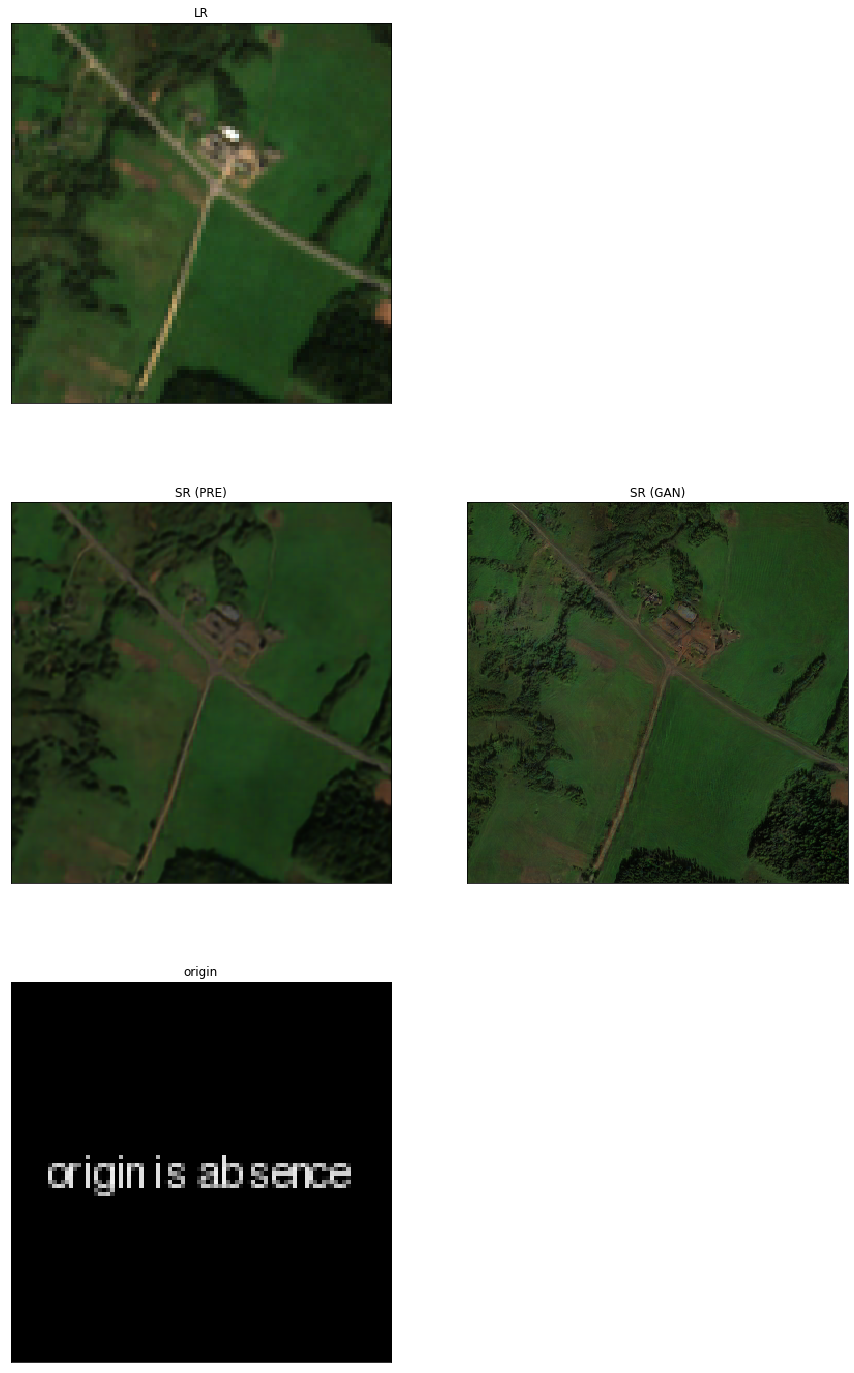

In [6]:
resolve_and_plot('2992x4.png')